# Data Pre-processing from Assignment 5

In [1]:
# Importing the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import folium
from folium import plugins

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the dataset
taxi_df = pd.read_csv("/content/drive/MyDrive/Dataset-Fereshteh/train.csv")

In [4]:
taxi_df = taxi_df.drop(['ORIGIN_CALL'], axis=1)

In [5]:
# replacing na values in ORIGIN_STAND feature with zero
taxi_df["ORIGIN_STAND"].fillna(0, inplace = True)

In [6]:
# Delete duplicate rows based on specific columns while keeping the first 
taxi_df = taxi_df.drop_duplicates(subset=["TRIP_ID"], keep='first')

In [7]:
# remove empty polyline
taxi_df = taxi_df[taxi_df.POLYLINE != '[]']

In [8]:
# remove missing GPS data
taxi_df = taxi_df[taxi_df.MISSING_DATA != True]

In [9]:
taxi_df = taxi_df.drop(['MISSING_DATA'], axis=1)

# Assignment 6- Data Visualization and storytelling

In [10]:
# converting UNIX time to a readable one
# converting WGS84 format into readable one
new_taxidf = taxi_df.copy()
new_taxidf['DATE'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).date())
new_taxidf['HOUR'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).hour)
new_taxidf['MINUTE'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).minute)
new_taxidf['DAY_MONTH'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).day)
# The weekday() method returns the day of the week as an integer, where Monday is 0 and Sunday is 6.
new_taxidf['DAY'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).weekday())
new_taxidf['MONTH'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).month)
new_taxidf['YEAR'] = new_taxidf.TIMESTAMP.apply(lambda x: dt.datetime.fromtimestamp(x).year)

In [11]:
#this line takes a while to run 
#new_taxidf['PICKUP_LOC'] = new_taxidf.POLYLINE.apply(lambda x: eval(x.split()[0])[0]) 
#new_taxidf['PICKUP_LOC'] = new_taxidf.PICKUP_LOC.apply(lambda x: np.flip(x,0))
new_taxidf['LENGHT'] = new_taxidf.POLYLINE.apply(lambda x: len(x))

In [12]:
new_taxidf.head()

,TRIP_ID,CALL_TYPE,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,POLYLINE,DATE,HOUR,MINUTE,DAY_MONTH,DAY,MONTH,YEAR,LENGHT
0,1372636858620000589,C,0.0,20000589,1372636858,A,"[[-8.618643,41.141412],[-8.618499,41.141376],[...",2013-07-01,0,0,1,0,7,2013,500
1,1372637303620000596,B,7.0,20000596,1372637303,A,"[[-8.639847,41.159826],[-8.640351,41.159871],[...",2013-07-01,0,8,1,0,7,2013,413
2,1372636951620000320,C,0.0,20000320,1372636951,A,"[[-8.612964,41.140359],[-8.613378,41.14035],[-...",2013-07-01,0,2,1,0,7,2013,1408
3,1372636854620000520,C,0.0,20000520,1372636854,A,"[[-8.574678,41.151951],[-8.574705,41.151942],[...",2013-07-01,0,0,1,0,7,2013,938
4,1372637091620000337,C,0.0,20000337,1372637091,A,"[[-8.645994,41.18049],[-8.645949,41.180517],[-...",2013-07-01,0,4,1,0,7,2013,634


## 1

<strong>Question</strong>: Are the number of trips evenly distributed across all months of the year, or are there significant variations or patterns that can be observed?

<strong>Answer</strong>: According to the chart below, the number of trips is evenly distributed throughout the year, but there are slightly higher numbers in some months such as May and October.

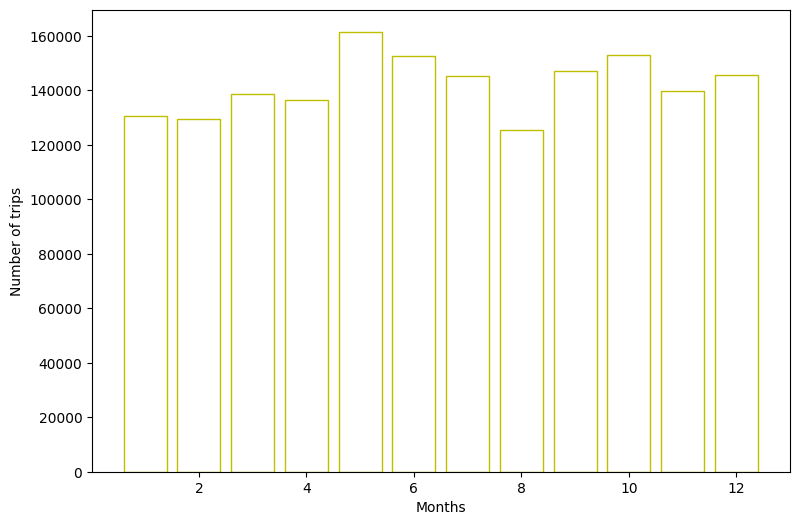

In [15]:
plt.figure(figsize=(9,6))
ax = plt.bar(
        new_taxidf.MONTH.value_counts().keys()
        , new_taxidf.MONTH.value_counts().values
        , color = 'w'
        , edgecolor = 'y')
plt.xlabel('Months')
plt.ylabel('Number of trips')
plt.show()

## 2

<strong>Question</strong>: Are the number of trips evenly distributed across all days of the week, or are there significant variations or patterns that can be observed?

<strong>Answer</strong>: According to the chart below, the number of trips is evenly distributed throughout the week, but the number of trips on Fridays and Saturdays are approximately higher than other days of the week.

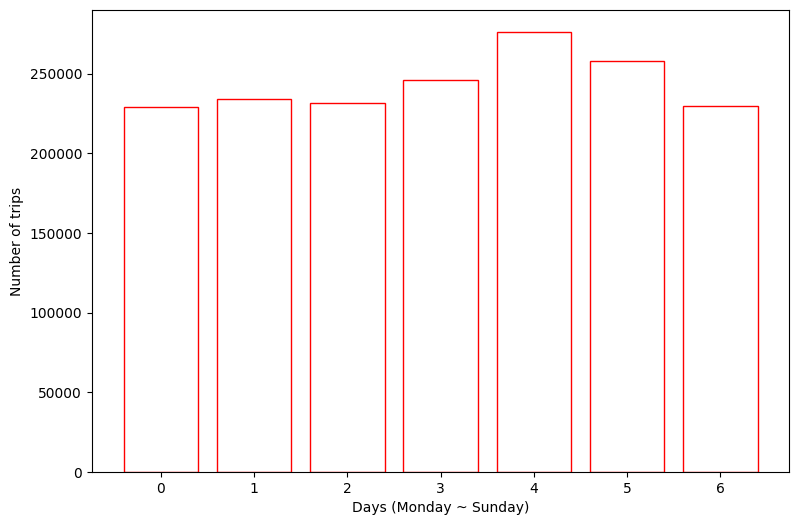

In [17]:
plt.figure(figsize=(9,6))
ax = plt.bar(
        new_taxidf.DAY.value_counts().keys()
        , new_taxidf.DAY.value_counts().values
        , color = 'w'
        , edgecolor = 'r')
plt.xlabel('Days (Monday ~ Sunday)')
plt.ylabel('Number of trips')
plt.show()

## 3

<strong>Question</strong>: What are the proportion or distribution of each trip type?

<strong>Answer</strong>: Based on the chart provided below, it can be observed that group B comprises nearly half of the total trips, while the number of trips belonging to group C is higher than group A, constituting almost a fifth of the overall trips.

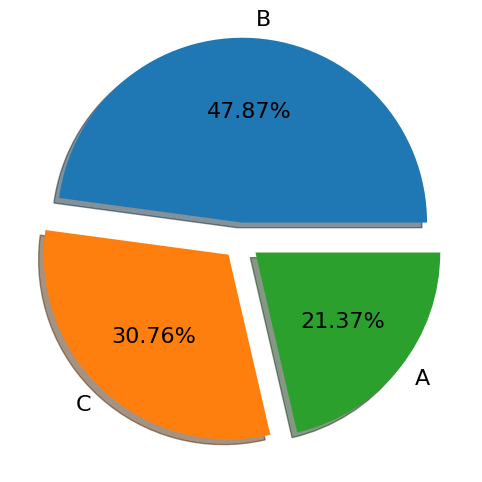

In [21]:
plt.figure(figsize=(9,6))
explode = (0.1, 0.1, 0.1)
plt.rc('font', size=16)
ax = plt.pie(
        explode = explode
        ,labels = new_taxidf.CALL_TYPE.value_counts().keys()
        ,x = new_taxidf.CALL_TYPE.value_counts().values
        ,shadow=True
        ,autopct='%1.2f%%')
plt.show()

# 4

<strong>Question</strong>: How the trips are distributed based on their length? Also, what is the shortest and longest trip length, as well as the average trip length?

<strong>Answer</strong>: We first removed the outliers using the IQR method, and then calculated the following parameters for the trip lengths (where each unit equals 15 seconds, hence the shortest trip length is 17*15 seconds):

    Mean: 932
    Standard deviation: 465
    Minimum: 17
    25th percentile: 593
    Median: 873
    75th percentile: 1219
    Maximum: 2298

It is worth noting that the variance of trip lengths is quite high, indicating a significant range of values.

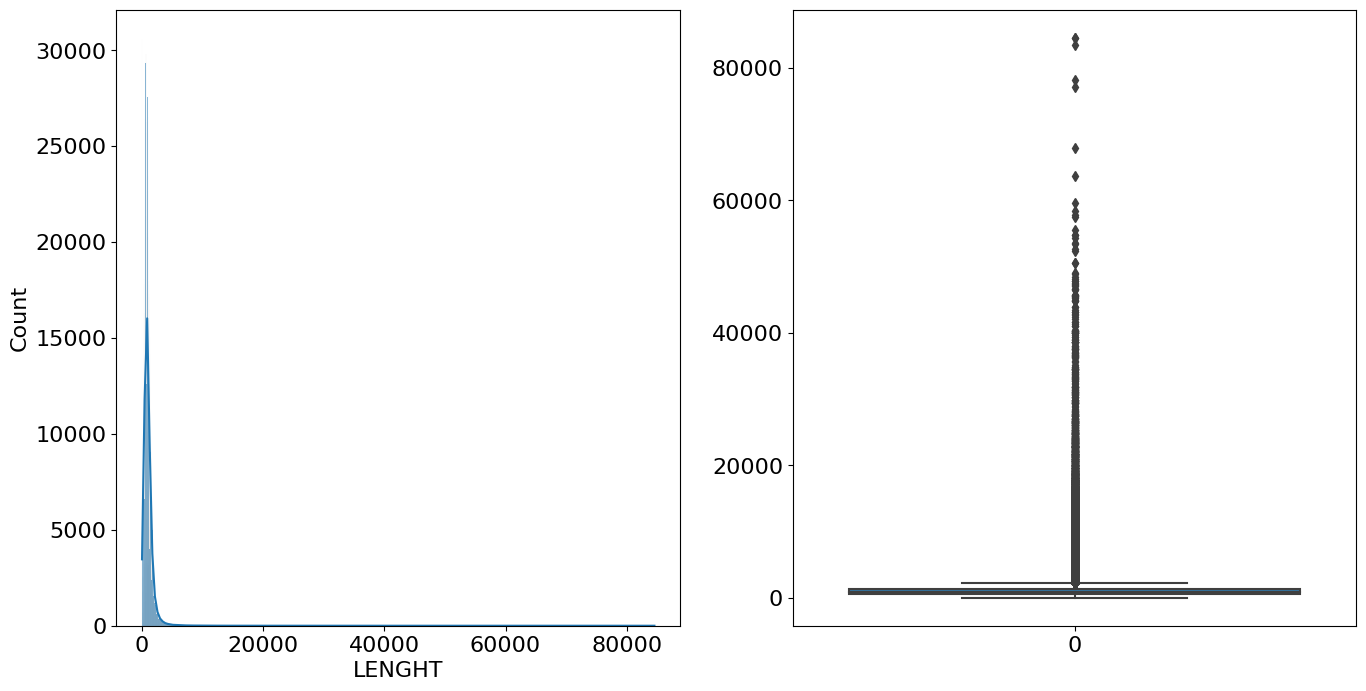

In [22]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
sns.histplot(new_taxidf['LENGHT'], kde=True)

plt.subplot(1,2,2)
sns.boxplot(data = new_taxidf['LENGHT'])

plt.show()

In [23]:
parameters = new_taxidf.LENGHT.describe()

print('count: ', round(parameters[0]))
print('mean:  ', round(parameters[1]))
print('std:   ', round(parameters[2]))
print('min:   ', round(parameters[3]))
print('25%:   ', round(parameters[4]))
print('50%:   ', round(parameters[5]))
print('75%:   ', round(parameters[6]))
print('max:   ', round(parameters[7]))

count:  1704682
mean:   1067
std:    994
min:    17
25%:    611
50%:    898
75%:    1286
max:    84570


In [24]:
mean = parameters[1]
std = parameters[2]

percentile25 = parameters[4]
percentile75 = parameters[6]

iqr = percentile75 - percentile25

upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [25]:
cleaned_parameters = new_taxidf[new_taxidf.LENGHT <= upper_limit].LENGHT.describe()

print('count: ', round(cleaned_parameters[0]))
print('mean:  ', round(cleaned_parameters[1]))
print('std:   ', round(cleaned_parameters[2]))
print('min:   ', round(cleaned_parameters[3]))
print('25%:   ', round(cleaned_parameters[4]))
print('50%:   ', round(cleaned_parameters[5]))
print('75%:   ', round(cleaned_parameters[6]))
print('max:   ', round(cleaned_parameters[7]))

count:  1625928
mean:   932
std:    465
min:    17
25%:    593
50%:    873
75%:    1219
max:    2298


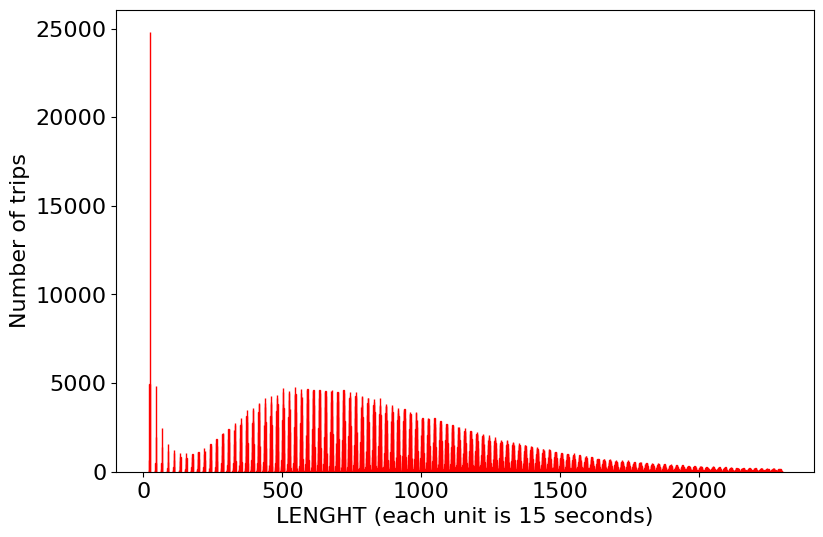

In [28]:
plt.figure(figsize=(9,6))
ax = plt.bar(
        new_taxidf[new_taxidf.LENGHT <= upper_limit].LENGHT.value_counts().keys()
        , new_taxidf[new_taxidf.LENGHT <= upper_limit].LENGHT.value_counts().values
        , color = 'w'
        , edgecolor = 'r')
plt.xlabel('LENGHT (each unit is 15 seconds)')
plt.ylabel('Number of trips')
plt.show()